In [32]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

In [33]:
ASSY37WDCB11shank0 = (
(0,0),
(0,40),
(5,80),
(10,120),
(15,160),
(20,200),
(25,240),
(30,280),
(70,20),
(65,60),
(60, 100),
(55, 140),
(50,180),
(45, 220),
(40, 260),
(35,305)
)
shank0_channels = (16,12,8,6,2,3,5,9,15,10,14,13,4,1,7,11)
ASSY37WDCB11shank1 = [(x + 250, y) for (x,y) in ASSY37WDCB11shank0]
shank1_channels = (17,21,22,25,27,29,28,30,18,23,19,20,24,26,31,32)

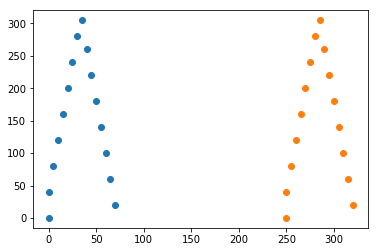

In [34]:
plt.plot([x for (x,y) in ASSY37WDCB11shank0],[y for (x,y) in ASSY37WDCB11shank0],'o')
plt.plot([x for (x,y) in ASSY37WDCB11shank1],[y for (x,y) in ASSY37WDCB11shank1],'o')


# Process adjacencies/geometries
Accounts for the channel mapping between the probe and the intan board.

In [35]:
#produces pairs of probe site adjacencies from the electrode coordinates in physical space through Delauney tesselation,
#subject to a maximum site spacing (in microns) of max_edgelength. 
import numpy as np
import scipy.spatial as spatial

def adjacency_from_geometry(coords, channels, max_edgelength = 40, correspondence = None):
        
    c = np.array(coords)
    tess = spatial.Delaunay(coords)
    indices, indptr = tess.vertex_neighbor_vertices
    adjs = []
    for k in range(indices.shape[0]-1):
        for j in indptr[indices[k]:indices[k+1]]:
            try:
                if(spatial.distance.euclidean(c[k], c[j]) < max_edgelength):
                    adjs.append((channels[k],channels[j]))
            except:
                pass
    return adjs
    

In [36]:
def translate_adjacencies(adjacencies, correspondence=None):
    if correspondence is not None:
        for i,(x,y) in enumerate(adjacencies):
            adjacencies[i] = (translate(x, correspondence), translate(y,correspondence))
    return adjacencies

def translate(val, correspondence):
    return [y for (x,y) in correspondence if x == val][0]

def geometries(channels, geo):
    geometry = {}
    for i,ch in enumerate(channels):
        geometry[ch] = geo[i]
    return geometry

In [39]:
intan = [19,28,20,27,21,26,22,25,23,24,16,31,18,29,17,30,14,1,13,2,15,0,8,7,9,6,10,5,11,4,12,3]
probe = [i for i in range(1,33)]
cor = list(zip(probe,intan))

In [40]:
shank0_adj = adjacency_from_geometry(ASSY37WDCB11shank0, shank0_channels, 50)
shank1_adj = adjacency_from_geometry(ASSY37WDCB11shank1, shank1_channels, 50)

channel_groups_intan = {}
channel_groups_intan[0] = {}
channel_groups_intan[0]['channels'] = [translate(ch, cor) for ch in shank0_channels]
channel_groups_intan[0]['graph'] = translate_adjacencies(shank0_adj,cor)
channel_groups_intan[0]['geometry'] = geometries([translate(ch, cor) for ch in shank0_channels], ASSY37WDCB11shank0)
channel_groups_intan[1] = {}
channel_groups_intan[1]['channels'] = [translate(ch, cor) for ch in shank1_channels]
channel_groups_intan[1]['graph'] = translate_adjacencies(shank1_adj,cor)
channel_groups_intan[1]['geometry'] = geometries(channel_groups[1]['channels'], ASSY37WDCB11shank1)

channel_groups = {}
channel_groups[0] = {}
channel_groups[0]['channels'] = shank0_channels
channel_groups[0]['graph'] = shank0_adj
channel_groups[0]['geometry'] = geometries(shank0_channels, ASSY37WDCB11shank0)
channel_groups[1] = {}
channel_groups[1]['channels'] = shank1_channels
channel_groups[1]['graph'] = shank1_adj
channel_groups[1]['geometry'] = geometries(shank1_channels, ASSY37WDCB11shank1)

In [41]:
channel_groups_intan

{0: {'channels': [30,
   31,
   25,
   26,
   28,
   20,
   21,
   23,
   17,
   24,
   29,
   18,
   27,
   19,
   22,
   16],
  'geometry': {16: (35, 305),
   17: (70, 20),
   18: (55, 140),
   19: (45, 220),
   20: (20, 200),
   21: (25, 240),
   22: (40, 260),
   23: (30, 280),
   24: (65, 60),
   25: (5, 80),
   26: (10, 120),
   27: (50, 180),
   28: (15, 160),
   29: (60, 100),
   30: (0, 0),
   31: (0, 40)},
  'graph': [(30, 31),
   (31, 30),
   (31, 25),
   (25, 31),
   (25, 26),
   (26, 18),
   (26, 28),
   (26, 25),
   (28, 18),
   (28, 27),
   (28, 20),
   (28, 26),
   (20, 27),
   (20, 28),
   (20, 19),
   (20, 21),
   (21, 22),
   (21, 23),
   (21, 20),
   (21, 19),
   (23, 22),
   (23, 16),
   (23, 21),
   (17, 24),
   (24, 17),
   (24, 29),
   (29, 24),
   (29, 18),
   (18, 27),
   (18, 29),
   (18, 28),
   (18, 26),
   (27, 18),
   (27, 28),
   (27, 20),
   (27, 19),
   (19, 20),
   (19, 21),
   (19, 27),
   (19, 22),
   (22, 23),
   (22, 16),
   (22, 21),
   (22, 19),

In [28]:
channel_groups

{0: {'channels': (16, 12, 8, 6, 2, 3, 5, 9, 15, 10, 14, 13, 4, 1, 7, 11),
  'geometry': {1: (45, 220),
   2: (15, 160),
   3: (20, 200),
   4: (50, 180),
   5: (25, 240),
   6: (10, 120),
   7: (40, 260),
   8: (5, 80),
   9: (30, 280),
   10: (65, 60),
   11: (35, 305),
   12: (0, 40),
   13: (55, 140),
   14: (60, 100),
   15: (70, 20),
   16: (0, 0)},
  'graph': [(1, 0),
   (0, 1),
   (0, 6),
   (6, 0),
   (6, 5),
   (5, 13),
   (5, 3),
   (5, 6),
   (3, 13),
   (3, 4),
   (3, 11),
   (3, 5),
   (11, 4),
   (11, 3),
   (11, 12),
   (11, 10),
   (10, 9),
   (10, 8),
   (10, 11),
   (10, 12),
   (8, 9),
   (8, 15),
   (8, 10),
   (14, 7),
   (7, 14),
   (7, 2),
   (2, 7),
   (2, 13),
   (13, 4),
   (13, 2),
   (13, 3),
   (13, 5),
   (4, 13),
   (4, 3),
   (4, 11),
   (4, 12),
   (12, 11),
   (12, 10),
   (12, 4),
   (12, 9),
   (9, 8),
   (9, 15),
   (9, 10),
   (9, 12),
   (15, 8),
   (15, 9)]},
 1: {'channels': (17,
   21,
   22,
   25,
   27,
   29,
   28,
   30,
   18,
   23,
   